In [3]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# Load the CSV file
csv_path = 'data/train.csv'  # replace with actual path
image_folder = 'data/train'

df = pd.read_csv(csv_path)

# Load images and labels into a list
data = []
labels = []

for idx, row in df.iterrows():
    image_id = row['image_id']
    label = row['label']
    image_path = os.path.join(image_folder, f"{image_id}.png")  # assuming images are .jpg
    try:
        image = Image.open(image_path).convert('RGB')  # or use grayscale: .convert('L')
        data.append(image)
        labels.append(label)
    except FileNotFoundError:
        print(f"Image not found: {image_path}")

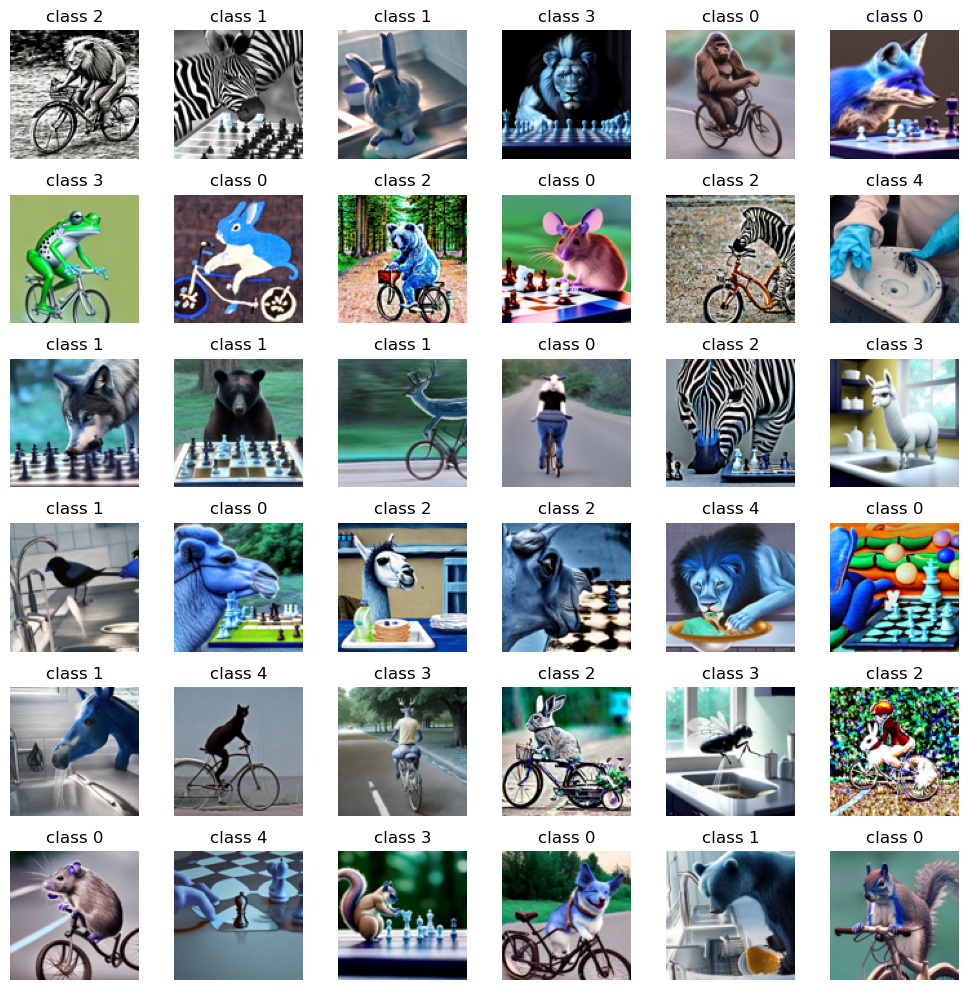

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Example class labels (customize as needed)
class_labels = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4']

plt.figure(figsize=(10, 10))

for i, j in enumerate(np.random.randint(0, len(data), 36)):
    plt.subplot(6, 6, i + 1)
    image, label = data[j], labels[j]
    image_np = np.array(image)  # Convert from PIL to NumPy
    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)  # Convert if needed
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title(class_labels[label])

plt.tight_layout()
plt.show()


## Preparing image data for the CNN

In [4]:
data = np.array(data).astype('float32')
data = data / 255.0


labels = np.array(labels)

print(data.shape)

(12500, 100, 100, 3)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.01, random_state=42)

In [6]:
len(x_test), len(x_train)

(12375, 125)

In [9]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [11]:
x_test.shape

(12375, 100, 100, 3)

In [43]:
from keras.layers import *
from keras.models import Model

def res_block(x, filters):  
    shortcut = x
    y = Conv2D(filters,3,padding='same')(x)  
    y = BatchNormalization()(y)  
    y = Activation('relu')(y)  
    y = Conv2D(filters,3,padding='same')(y)  
    y = BatchNormalization()(y)  

    if x.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
        
    return Activation('relu')(Add()([shortcut,y]))  

def build_model2(input_shape=(100,100,3), n_classes=5):  
    inp = Input(input_shape)  
    x = Conv2D(64,3,padding='same')(inp)  
    x = BatchNormalization()(x)  
    x = Activation('relu')(x)  
    for f in [64,128,256]:  
        x = res_block(x,f)  
        x = MaxPooling2D(2)(x)  
    x = GlobalAveragePooling2D()(x)  
    x = Dropout(0.5)(x)  
    out = Dense(n_classes,activation='softmax')(x)  
    return Model(inp,out)  

# model with residual blocks
model_res = build_model2()

In [44]:
# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake.h5")
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake2.h5")
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake3.h5")
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake4.h5")

Epoch 1/2


KeyboardInterrupt: 

In [29]:
# Compile and train
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual5.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual6.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual7.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual8.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual9.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual10.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual11.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual12.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual13.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual14.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual15.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual16.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual17.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual18.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual19.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual20.h5")

196/196 ━━━━━━━━━━━━━━━━━━━━ 947s 5s/step - accuracy: 0.8540 - loss: 0.4131 - val_accuracy: 0.5385 - val_loss: 2.5263


196/196 ━━━━━━━━━━━━━━━━━━━━ 660s 3s/step - accuracy: 0.8635 - loss: 0.3647 - val_accuracy: 0.6923 - val_loss: 1.0885


196/196 ━━━━━━━━━━━━━━━━━━━━ 955s 5s/step - accuracy: 0.8687 - loss: 0.3638 - val_accuracy: 0.6923 - val_loss: 2.8922


196/196 ━━━━━━━━━━━━━━━━━━━━ 943s 5s/step - accuracy: 0.8714 - loss: 0.3470 - val_accuracy: 0.7692 - val_loss: 1.7781


196/196 ━━━━━━━━━━━━━━━━━━━━ 749s 4s/step - accuracy: 0.8873 - loss: 0.3063 - val_accuracy: 0.8462 - val_loss: 0.4117


196/196 ━━━━━━━━━━━━━━━━━━━━ 888s 5s/step - accuracy: 0.8961 - loss: 0.2891 - val_accuracy: 0.6154 - val_loss: 2.3520


196/196 ━━━━━━━━━━━━━━━━━━━━ 986s 5s/step - accuracy: 0.8835 - loss: 0.3114 - val_accuracy: 0.7692 - val_loss: 0.8062


196/196 ━━━━━━━━━━━━━━━━━━━━ 804s 4s/step - accuracy: 0.9029 - loss: 0.2678 - val_accuracy: 0.8462 - val_loss: 1.4834


196/196 ━━━━━━━━━━━━━━━━━━━━ 546s 3s/step - accuracy: 0.9081 - loss: 0.2535 - val_accuracy: 0.7692 - val_loss: 0.5474


196/196 ━━━━━━━━━━━━━━━━━━━━ 545s 3s/step - accuracy: 0.9083 - loss: 0.2489 - val_accuracy: 0.6154 - val_loss: 2.4031


196/196 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.9120 - loss: 0.2370 - val_accuracy: 0.6923 - val_loss: 0.8836


196/196 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.9129 - loss: 0.2350 - val_accuracy: 0.8462 - val_loss: 0.4759


196/196 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.9182 - loss: 0.2223 - val_accuracy: 0.7692 - val_loss: 1.5445


196/196 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.9229 - loss: 0.2187 - val_accuracy: 0.8462 - val_loss: 1.6503


196/196 ━━━━━━━━━━━━━━━━━━━━ 558s 3s/step - accuracy: 0.9260 - loss: 0.2002 - val_accuracy: 0.6923 - val_loss: 1.7056


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9337 - loss: 0.1767 - val_accuracy: 0.7692 - val_loss: 1.0764


In [27]:
# Compile and train
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_res.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual.h5")
history = model_res.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual2.h5")
history = model_res.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual3.h5")
history = model_res.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual4.h5")

Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 789s 4s/step - accuracy: 0.6115 - loss: 1.1421 - val_accuracy: 0.4615 - val_loss: 1.3958
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 1120s 6s/step - accuracy: 0.7422 - loss: 0.6699 - val_accuracy: 0.4615 - val_loss: 1.5287


Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 806s 4s/step - accuracy: 0.7777 - loss: 0.5912 - val_accuracy: 0.6923 - val_loss: 0.4796
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 1187s 6s/step - accuracy: 0.7918 - loss: 0.5450 - val_accuracy: 0.6154 - val_loss: 1.2493


Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 950s 5s/step - accuracy: 0.8189 - loss: 0.4847 - val_accuracy: 0.3846 - val_loss: 3.1896
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 1253s 6s/step - accuracy: 0.8365 - loss: 0.4585 - val_accuracy: 0.6923 - val_loss: 0.5549


Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 1526s 8s/step - accuracy: 0.8391 - loss: 0.4347 - val_accuracy: 0.7692 - val_loss: 0.4382
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 701s 4s/step - accuracy: 0.8525 - loss: 0.4034 - val_accuracy: 0.5385 - val_loss: 1.3951


In [19]:

history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake_new5.h5")
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake_new6.h5")

Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 140ms/step - accuracy: 0.9795 - loss: 0.0668 - val_accuracy: 0.6923 - val_loss: 1.8922
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.9796 - loss: 0.0628 - val_accuracy: 0.8462 - val_loss: 0.6548


Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9816 - loss: 0.0597 - val_accuracy: 0.6154 - val_loss: 1.6046
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.9808 - loss: 0.0579 - val_accuracy: 0.7692 - val_loss: 1.5974


In [13]:
from keras.models import load_model

# Load the trained model
model = load_model('deepfake9.h5')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake_new1.h5")

history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake_new2.h5")

history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake_new3.h5")

history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), batch_size=64)
model.save("deepfake_new4.h5")

Epoch 1/2
192/192 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.9183 - loss: 0.3000 - val_accuracy: 0.8440 - val_loss: 0.5141
Epoch 2/2
192/192 ━━━━━━━━━━━━━━━━━━━━ 29s 151ms/step - accuracy: 0.9523 - loss: 0.1434 - val_accuracy: 0.8440 - val_loss: 0.4916


Epoch 1/2
192/192 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.9628 - loss: 0.1059 - val_accuracy: 0.8080 - val_loss: 0.6041
Epoch 2/2
192/192 ━━━━━━━━━━━━━━━━━━━━ 31s 160ms/step - accuracy: 0.9790 - loss: 0.0672 - val_accuracy: 0.8400 - val_loss: 0.5997


Epoch 1/2
192/192 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - accuracy: 0.9641 - loss: 0.1030 - val_accuracy: 0.8200 - val_loss: 0.7951
Epoch 2/2
192/192 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.9825 - loss: 0.0531 - val_accuracy: 0.8000 - val_loss: 0.7052


Epoch 1/2
192/192 ━━━━━━━━━━━━━━━━━━━━ 30s 158ms/step - accuracy: 0.9835 - loss: 0.0540 - val_accuracy: 0.7840 - val_loss: 0.7932
Epoch 2/2
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step - accuracy: 0.9769 - loss: 0.0664 - val_accuracy: 0.8280 - val_loss: 0.8212


In [13]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from keras.models import load_model

# Load the trained model
model = load_model('deepfake_residual147.h5')

# Paths
csv_path = 'data/test.csv'         # CSV file with 'image_id' column
image_folder = 'data/test'         # Folder with test images

# Load the CSV
df = pd.read_csv(csv_path)

# Image settings (must match model input size)
IMG_SIZE = (100, 100)

# Prepare images for prediction
test_images = []
image_ids = []

for idx, row in df.iterrows():
    image_id = row['image_id']
    image_path = os.path.join(image_folder, f"{image_id}.png")

    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize(IMG_SIZE)
        img_array = np.array(img) / 255.0  # normalize
        test_images.append(img_array)
        image_ids.append(image_id)
    except FileNotFoundError:
        print(f"Image not found: {image_path}")

# Convert list to array
test_images = np.array(test_images)

# Predict
predictions = model.predict(test_images)

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Save to CSV
output_df = pd.DataFrame({
    'image_id': image_ids,
    'predicted_class': predicted_classes
})

output_df.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

204/204 ━━━━━━━━━━━━━━━━━━━━ 73s 357ms/step
Predictions saved to predictions.csv


In [48]:
# Afișează primele rânduri
print(df.head())

# Afișează numele coloanelor
print(df.columns)

# Afișează distribuția claselor (presupunând că se află într-o coloană numită 'label' sau 'class')
print(df['label'].value_counts())

                               image_id  label
0  532de967-c8fb-49a6-9a8c-3c32cfa93d3e      0
1  c0519e94-1422-405c-a847-ce726f4a13cf      2
2  13a99838-2919-4b79-b9fd-bce8f0e59e09      2
3  5394f036-7549-4afd-8437-46936d31fc5d      3
4  9ea32dc6-77bc-4dca-8d8d-05b368b3fa13      4
Index(['image_id', 'label'], dtype='object')
label
0    2500
2    2500
3    2500
4    2500
1    2500
Name: count, dtype: int64


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

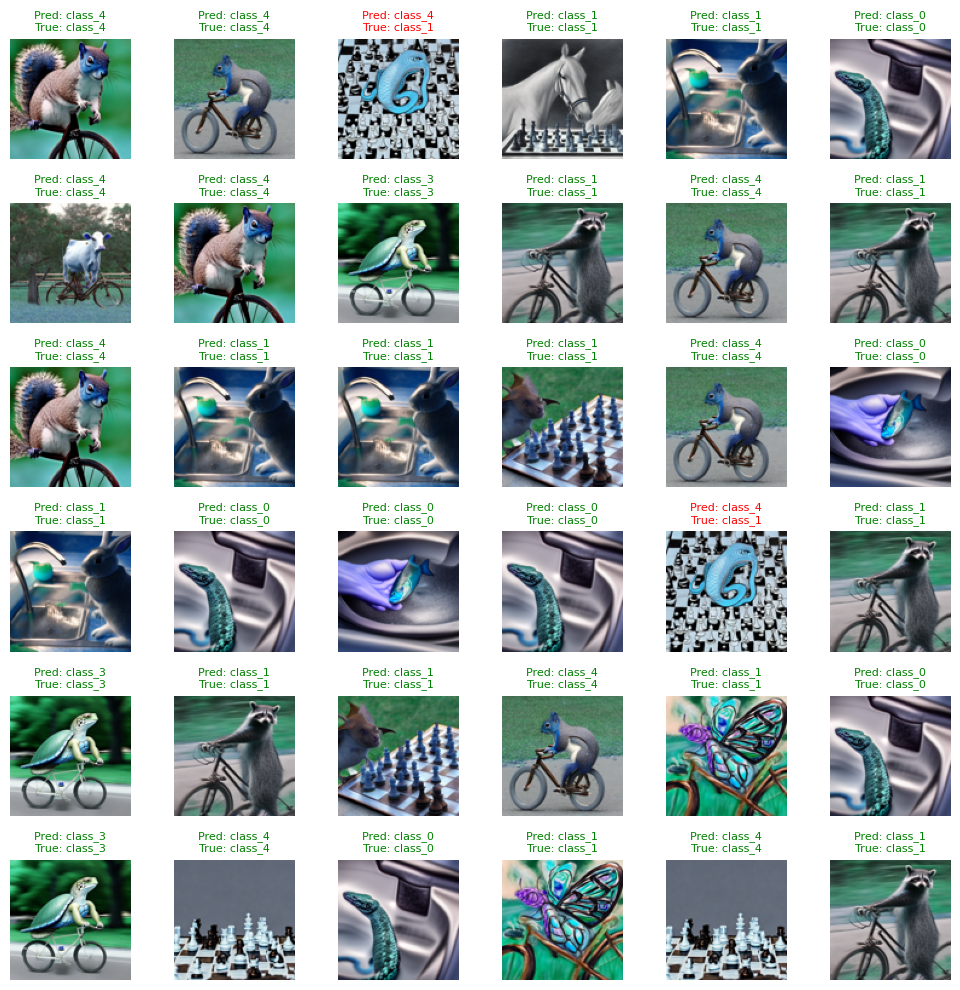

In [52]:
plt.figure(figsize=(10, 10))

for i, j in enumerate(list(np.random.randint(0, len(x_test), 36))):
    plt.subplot(6, 6, i+1)

    image = cv2.cvtColor(x_test[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")

    predictions = model.predict(np.expand_dims(x_test[j], axis=0))
    predicted_class_idx = np.argmax(predictions)
    ground_truth_idx = np.argmax(y_test[j])

    # Get class names
    predicted_class = class_labels[predicted_class_idx]
    true_class = class_labels[ground_truth_idx]

    # Set title color based on prediction accuracy
    title_color = 'green' if predicted_class_idx == ground_truth_idx else 'red'

    # Display both prediction and ground truth
    plt.title(f"Pred: {predicted_class}\nTrue: {true_class}",
              color=title_color, fontsize=8)

plt.tight_layout()
plt.show()

## Visualising the loss decrease

## Visualising the accuracy on training and validation

## Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


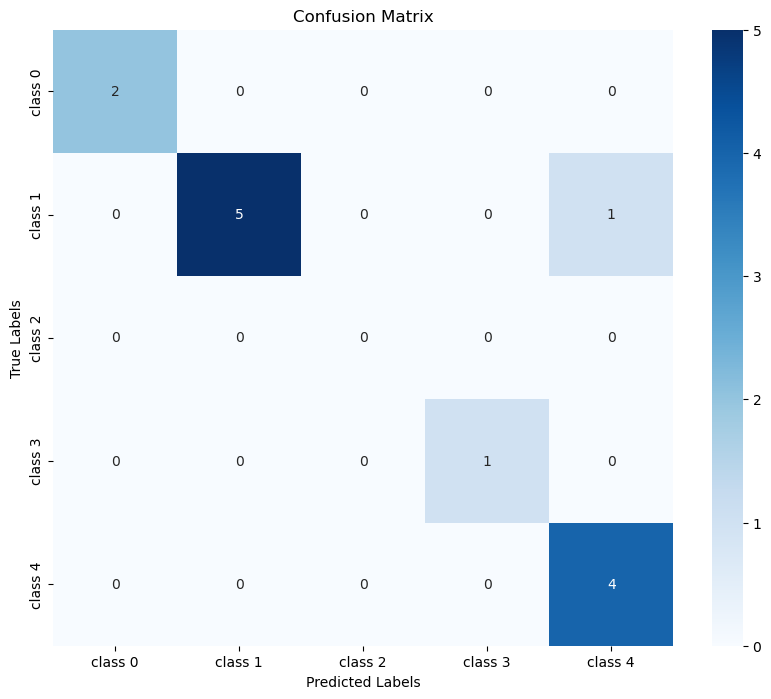

Classification Report:
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       1.00      0.83      0.91         6
     class 2       0.00      0.00      0.00         0
     class 3       1.00      1.00      1.00         1
     class 4       0.80      1.00      0.89         4

    accuracy                           0.92        13
   macro avg       0.76      0.77      0.76        13
weighted avg       0.94      0.92      0.92        13



In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

labels = list(range(len(class_labels)))

#compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, labels=labels)

#plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, labels=labels, target_names=class_labels, zero_division=0))


In [30]:
# Compile and train
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual21.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual22.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual23.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual24.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual25.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual26.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual27.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual28.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual29.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual30.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual31.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual32.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual33.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual34.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual35.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual36.h5")

196/196 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.9312 - loss: 0.1890 - val_accuracy: 0.8462 - val_loss: 0.7532


196/196 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.9267 - loss: 0.1974 - val_accuracy: 0.6923 - val_loss: 1.5125


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9433 - loss: 0.1540 - val_accuracy: 0.7692 - val_loss: 4.5229


196/196 ━━━━━━━━━━━━━━━━━━━━ 556s 3s/step - accuracy: 0.9334 - loss: 0.1732 - val_accuracy: 0.6154 - val_loss: 1.7985


196/196 ━━━━━━━━━━━━━━━━━━━━ 552s 3s/step - accuracy: 0.9432 - loss: 0.1524 - val_accuracy: 0.8462 - val_loss: 0.3773


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9284 - loss: 0.1999 - val_accuracy: 0.9231 - val_loss: 0.7656


196/196 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9523 - loss: 0.1280 - val_accuracy: 0.8462 - val_loss: 3.6587


196/196 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9414 - loss: 0.1689 - val_accuracy: 0.7692 - val_loss: 1.2264


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9323 - loss: 0.1942 - val_accuracy: 0.9231 - val_loss: 2.1183


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9558 - loss: 0.1197 - val_accuracy: 0.7692 - val_loss: 1.6570


196/196 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.9654 - loss: 0.0978 - val_accuracy: 0.6154 - val_loss: 1.0840


196/196 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.9650 - loss: 0.0952 - val_accuracy: 0.7692 - val_loss: 1.6765


196/196 ━━━━━━━━━━━━━━━━━━━━ 548s 3s/step - accuracy: 0.9688 - loss: 0.0904 - val_accuracy: 0.6923 - val_loss: 3.3458


196/196 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.9436 - loss: 0.1713 - val_accuracy: 0.8462 - val_loss: 0.4793


196/196 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.9669 - loss: 0.0874 - val_accuracy: 0.9231 - val_loss: 1.7792


196/196 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.9555 - loss: 0.1261 - val_accuracy: 0.6154 - val_loss: 2.9472


In [31]:
# Compile and train
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual37.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual38.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual39.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual40.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual41.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual42.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual43.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual44.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual45.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual46.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual47.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual48.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual49.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual50.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual51.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual52.h5")

196/196 ━━━━━━━━━━━━━━━━━━━━ 555s 3s/step - accuracy: 0.9690 - loss: 0.0899 - val_accuracy: 0.7692 - val_loss: 1.6770


196/196 ━━━━━━━━━━━━━━━━━━━━ 546s 3s/step - accuracy: 0.9649 - loss: 0.0998 - val_accuracy: 0.5385 - val_loss: 8.7040


196/196 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.9695 - loss: 0.0805 - val_accuracy: 0.8462 - val_loss: 0.6598


196/196 ━━━━━━━━━━━━━━━━━━━━ 559s 3s/step - accuracy: 0.9575 - loss: 0.1173 - val_accuracy: 0.6154 - val_loss: 1.1461


196/196 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.9758 - loss: 0.0675 - val_accuracy: 0.6923 - val_loss: 3.9971


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9613 - loss: 0.1103 - val_accuracy: 0.5385 - val_loss: 5.1717


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9765 - loss: 0.0683 - val_accuracy: 0.9231 - val_loss: 2.1208


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9807 - loss: 0.0587 - val_accuracy: 0.7692 - val_loss: 2.1902


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9309 - loss: 0.2163 - val_accuracy: 0.7692 - val_loss: 1.9268


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9815 - loss: 0.0523 - val_accuracy: 0.6923 - val_loss: 6.8820


196/196 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.9789 - loss: 0.0625 - val_accuracy: 0.5385 - val_loss: 3.2244


196/196 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9829 - loss: 0.0474 - val_accuracy: 0.7692 - val_loss: 4.2355


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9850 - loss: 0.0439 - val_accuracy: 0.9231 - val_loss: 1.1764


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9705 - loss: 0.0877 - val_accuracy: 0.6923 - val_loss: 5.7889


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9909 - loss: 0.0294 - val_accuracy: 0.6923 - val_loss: 8.7390


196/196 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.9873 - loss: 0.0420 - val_accuracy: 0.7692 - val_loss: 1.2776


In [32]:
# Compile and train
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual53.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual54.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual55.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual56.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual57.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual58.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual59.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual60.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual61.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual62.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual63.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual64.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual65.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual66.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual67.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual68.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual69.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual70.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual71.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual72.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual73.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual74.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual75.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual76.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual77.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual78.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual79.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual80.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual81.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual82.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual83.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual84.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual85.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual86.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual87.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual88.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual89.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual90.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual91.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual92.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual93.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual94.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual95.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual96.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual97.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual98.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual99.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual100.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual101.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual102.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual103.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual104.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual105.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual106.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual107.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual108.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual109.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual110.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual111.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual112.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual113.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual114.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual115.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual116.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual117.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual118.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual119.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual120.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual121.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual122.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual123.h5")

196/196 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.9839 - loss: 0.0509 - val_accuracy: 0.7692 - val_loss: 1.8741


196/196 ━━━━━━━━━━━━━━━━━━━━ 540s 3s/step - accuracy: 0.9825 - loss: 0.0482 - val_accuracy: 0.8462 - val_loss: 1.4342


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9848 - loss: 0.0401 - val_accuracy: 0.6923 - val_loss: 4.8770


196/196 ━━━━━━━━━━━━━━━━━━━━ 554s 3s/step - accuracy: 0.9778 - loss: 0.0676 - val_accuracy: 0.8462 - val_loss: 0.9178


196/196 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.9872 - loss: 0.0422 - val_accuracy: 0.6154 - val_loss: 9.1622


196/196 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.9911 - loss: 0.0300 - val_accuracy: 0.6154 - val_loss: 1.3428


196/196 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.9496 - loss: 0.1763 - val_accuracy: 0.9231 - val_loss: 3.6675


196/196 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.7692 - val_loss: 5.6364


196/196 ━━━━━━━━━━━━━━━━━━━━ 552s 3s/step - accuracy: 0.9675 - loss: 0.1158 - val_accuracy: 0.9231 - val_loss: 1.7203


196/196 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.9933 - loss: 0.0235 - val_accuracy: 0.5385 - val_loss: 5.0485


196/196 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.7692 - val_loss: 3.2153


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9733 - loss: 0.0833 - val_accuracy: 0.6923 - val_loss: 5.3392


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9758 - loss: 0.0740 - val_accuracy: 0.8462 - val_loss: 1.2144


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9921 - loss: 0.0225 - val_accuracy: 0.9231 - val_loss: 1.9776


196/196 ━━━━━━━━━━━━━━━━━━━━ 543s 3s/step - accuracy: 0.9953 - loss: 0.0166 - val_accuracy: 0.7692 - val_loss: 3.6580


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9940 - loss: 0.0227 - val_accuracy: 0.8462 - val_loss: 4.4848


196/196 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.9646 - loss: 0.0971 - val_accuracy: 0.5385 - val_loss: 5.0289


196/196 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.6154 - val_loss: 2.7284


196/196 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.9264 - loss: 0.2759 - val_accuracy: 0.9231 - val_loss: 1.4949


196/196 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.9765 - loss: 0.0652 - val_accuracy: 0.9231 - val_loss: 2.4007


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9727 - loss: 0.0925 - val_accuracy: 0.8462 - val_loss: 2.0160


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9903 - loss: 0.0284 - val_accuracy: 0.8462 - val_loss: 3.4802


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9967 - loss: 0.0115 - val_accuracy: 0.7692 - val_loss: 6.7500


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9903 - loss: 0.0341 - val_accuracy: 0.8462 - val_loss: 0.2517


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9512 - loss: 0.1600 - val_accuracy: 0.8462 - val_loss: 3.1043


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9527 - loss: 0.1483 - val_accuracy: 0.9231 - val_loss: 2.1310


196/196 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.9925 - loss: 0.0223 - val_accuracy: 0.9231 - val_loss: 3.2100


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9951 - loss: 0.0177 - val_accuracy: 0.8462 - val_loss: 2.0323


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9978 - loss: 0.0107 - val_accuracy: 0.9231 - val_loss: 2.0472


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9977 - loss: 0.0089 - val_accuracy: 0.9231 - val_loss: 2.3096


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9864 - loss: 0.0470 - val_accuracy: 0.9231 - val_loss: 1.7396


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9804 - loss: 0.0650 - val_accuracy: 0.8462 - val_loss: 5.5551


196/196 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 0.9928 - loss: 0.0193 - val_accuracy: 0.9231 - val_loss: 2.4236


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9977 - loss: 0.0093 - val_accuracy: 0.7692 - val_loss: 4.1448


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9988 - loss: 0.0070 - val_accuracy: 0.9231 - val_loss: 1.0000


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9961 - loss: 0.0139 - val_accuracy: 0.7692 - val_loss: 12.2461


196/196 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9661 - loss: 0.1140 - val_accuracy: 0.8462 - val_loss: 5.8722


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9889 - loss: 0.0326 - val_accuracy: 0.6154 - val_loss: 4.3770


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9872 - loss: 0.0397 - val_accuracy: 0.9231 - val_loss: 1.1162


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.8462 - val_loss: 2.5725


196/196 ━━━━━━━━━━━━━━━━━━━━ 528s 3s/step - accuracy: 0.9701 - loss: 0.1038 - val_accuracy: 0.9231 - val_loss: 3.0005


196/196 ━━━━━━━━━━━━━━━━━━━━ 527s 3s/step - accuracy: 0.9967 - loss: 0.0116 - val_accuracy: 0.8462 - val_loss: 6.0564


196/196 ━━━━━━━━━━━━━━━━━━━━ 528s 3s/step - accuracy: 0.9763 - loss: 0.0741 - val_accuracy: 0.9231 - val_loss: 1.0128


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9972 - loss: 0.0128 - val_accuracy: 0.9231 - val_loss: 2.1310


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9989 - loss: 0.0060 - val_accuracy: 0.9231 - val_loss: 3.0308


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9645 - loss: 0.1264 - val_accuracy: 0.9231 - val_loss: 1.3451


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9954 - loss: 0.0144 - val_accuracy: 0.9231 - val_loss: 1.0865


196/196 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9964 - loss: 0.0132 - val_accuracy: 0.8462 - val_loss: 2.5925


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9943 - loss: 0.0169 - val_accuracy: 0.8462 - val_loss: 3.8429


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9963 - loss: 0.0128 - val_accuracy: 0.5385 - val_loss: 7.6917


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9778 - loss: 0.0737 - val_accuracy: 0.9231 - val_loss: 1.8344


196/196 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 0.9935 - loss: 0.0225 - val_accuracy: 0.6154 - val_loss: 4.2023


196/196 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 0.9707 - loss: 0.0932 - val_accuracy: 0.9231 - val_loss: 1.7155


196/196 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.9974 - loss: 0.0105 - val_accuracy: 0.8462 - val_loss: 3.3244


196/196 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.9957 - loss: 0.0119 - val_accuracy: 0.9231 - val_loss: 2.1474


196/196 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.9982 - loss: 0.0064 - val_accuracy: 0.9231 - val_loss: 1.4492


196/196 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9968 - loss: 0.0111 - val_accuracy: 0.8462 - val_loss: 2.9419


196/196 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9231 - val_loss: 3.8964


196/196 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.9953 - loss: 0.0134 - val_accuracy: 0.7692 - val_loss: 5.8772


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9921 - loss: 0.0219 - val_accuracy: 0.6923 - val_loss: 4.5410


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9850 - loss: 0.0498 - val_accuracy: 0.9231 - val_loss: 2.6886


196/196 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9511 - loss: 0.1992 - val_accuracy: 0.8462 - val_loss: 4.9735


196/196 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.9955 - loss: 0.0183 - val_accuracy: 0.9231 - val_loss: 3.6729


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 0.9231 - val_loss: 4.4419


196/196 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.9988 - loss: 0.0054 - val_accuracy: 0.9231 - val_loss: 4.4767


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9986 - loss: 0.0055 - val_accuracy: 0.6923 - val_loss: 2.1937


196/196 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9231 - val_loss: 2.9169


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9976 - loss: 0.0069 - val_accuracy: 0.9231 - val_loss: 5.5187


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9979 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0230


196/196 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.9969 - loss: 0.0102 - val_accuracy: 0.9231 - val_loss: 5.3548


196/196 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.6154 - val_loss: 8.9535


In [35]:
# Compile and train
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual123.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual124.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual125.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual126.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual127.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual128.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual129.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual130.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual131.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual132.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual133.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual134.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual135.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual136.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual137.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual138.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual139.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual140.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual141.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual142.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual143.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual144.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual145.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual146.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual147.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual148.h5")
history = model_res.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model_res.save("deepfake_residual149.h5")

196/196 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9231 - val_loss: 2.0749


196/196 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.9890 - loss: 0.0352 - val_accuracy: 0.9231 - val_loss: 0.7531


196/196 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.8462 - val_loss: 6.1231


196/196 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.9975 - loss: 0.0097 - val_accuracy: 0.8462 - val_loss: 5.0601


196/196 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.7692 - val_loss: 2.4434


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9856 - loss: 0.0437 - val_accuracy: 0.6154 - val_loss: 2.9057


196/196 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9951 - loss: 0.0198 - val_accuracy: 0.9231 - val_loss: 4.0652


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.6923 - val_loss: 5.8335


196/196 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9231 - val_loss: 1.8095


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9822 - loss: 0.0579 - val_accuracy: 0.9231 - val_loss: 1.7268


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9977 - loss: 0.0088 - val_accuracy: 0.8462 - val_loss: 4.7742


196/196 ━━━━━━━━━━━━━━━━━━━━ 540s 3s/step - accuracy: 0.9955 - loss: 0.0165 - val_accuracy: 0.9231 - val_loss: 0.3958


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9947 - loss: 0.0127 - val_accuracy: 0.8462 - val_loss: 1.7093


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9231 - val_loss: 3.5015


196/196 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.7692 - val_loss: 2.0798


196/196 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.9959 - loss: 0.0170 - val_accuracy: 0.9231 - val_loss: 4.7909


196/196 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.9951 - loss: 0.0169 - val_accuracy: 0.6923 - val_loss: 1.3959


196/196 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9231 - val_loss: 3.8997


196/196 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9951 - loss: 0.0177 - val_accuracy: 0.9231 - val_loss: 8.0792


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9788 - loss: 0.0675 - val_accuracy: 0.7692 - val_loss: 5.2049


196/196 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.9989 - loss: 0.0082 - val_accuracy: 0.9231 - val_loss: 2.8743


196/196 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.9751 - loss: 0.0948 - val_accuracy: 0.9231 - val_loss: 1.3229


196/196 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9231 - val_loss: 3.2966


196/196 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9970 - loss: 0.0097 - val_accuracy: 0.9231 - val_loss: 1.5971


196/196 ━━━━━━━━━━━━━━━━━━━━ 545s 3s/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 0.9231 - val_loss: 1.8698


196/196 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9830 - loss: 0.0593 - val_accuracy: 0.8462 - val_loss: 2.5744


196/196 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.9918 - loss: 0.0301 - val_accuracy: 0.9231 - val_loss: 2.5824


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

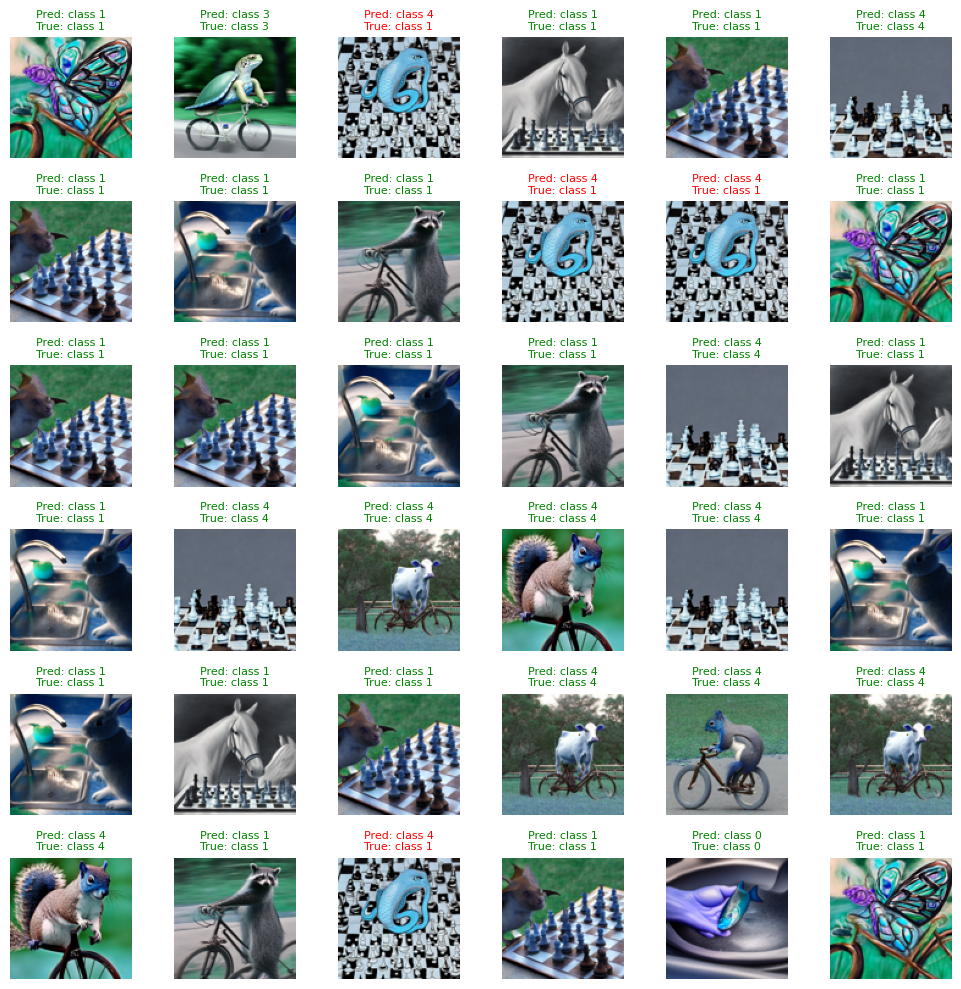

In [47]:
plt.figure(figsize=(10, 10))

for i, j in enumerate(list(np.random.randint(0, len(x_test), 36))):
    plt.subplot(6, 6, i+1)

    image = cv2.cvtColor(x_test[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")

    predictions = model.predict(np.expand_dims(x_test[j], axis=0))
    predicted_class_idx = np.argmax(predictions)
    ground_truth_idx = np.argmax(y_test[j])

    # Get class names
    predicted_class = class_labels[predicted_class_idx]
    true_class = class_labels[ground_truth_idx]

    # Set title color based on prediction accuracy
    title_color = 'green' if predicted_class_idx == ground_truth_idx else 'red'

    # Display both prediction and ground truth
    plt.title(f"Pred: {predicted_class}\nTrue: {true_class}",
              color=title_color, fontsize=8)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


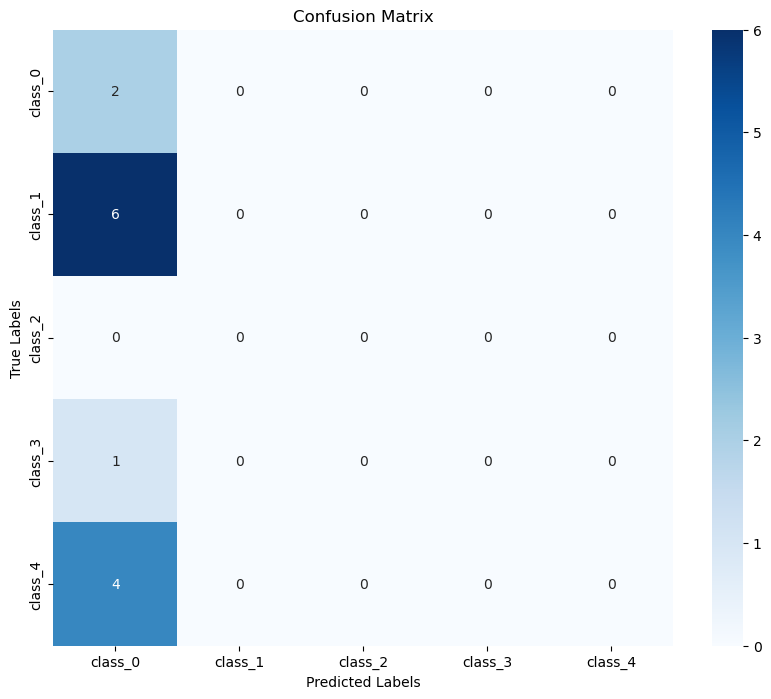

Classification Report:
              precision    recall  f1-score   support

     class_0       0.15      1.00      0.27         2
     class_1       0.00      0.00      0.00         6
     class_2       0.00      0.00      0.00         0
     class_3       0.00      0.00      0.00         1
     class_4       0.00      0.00      0.00         4

    accuracy                           0.15        13
   macro avg       0.03      0.20      0.05        13
weighted avg       0.02      0.15      0.04        13



In [55]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Listele de clase (nume simbolice)
class_labels = ["class_0", "class_1", "class_2", "class_3", "class_4"]
labels = list(range(len(class_labels)))

# Obține predicțiile modelului (probabilități pe clase)
y_pred = model_res.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertim y_test (one-hot) în etichete numerice
y_true_classes = np.argmax(y_test, axis=1)

# Creează matricea de confuzie
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, labels=labels)

# Afișează matricea de confuzie
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes,
                            labels=labels,
                            target_names=class_labels,
                            zero_division=0))

In [51]:
np.bincount(np.argmax(y_test, axis=1))

array([2, 6, 0, 1, 4])

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Încarcă etichetele reale
df = pd.read_csv('data/test.csv')
y_true = df['label'].values  # etichetele reale

# Vectorul de clase prezise deja este:
# predicted_classes = np.argmax(predictions, axis=1)

# Definește clasele (dacă ai 5 clase: 0–4)
class_labels = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4']
labels = list(range(len(class_labels)))

# Creează matricea de confuzie
conf_matrix = confusion_matrix(y_true, predicted_classes, labels=labels)

# Afișează matricea
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, predicted_classes, target_names=class_labels, zero_division=0))

KeyError: 'label'

In [ ]:
from keras.models import load_model

# Load the trained model
model = load_model('deepfake_residual147.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, batch_size=64)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Load the trained model
model = load_model('deepfake_residual116.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, batch_size=64)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Load the trained model
model = load_model('deepfake_residual131.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, batch_size=64)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Load the trained model
model = load_model('deepfake_residual137.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, batch_size=64)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")



194/194 ━━━━━━━━━━━━━━━━━━━━ 133s 686ms/step - accuracy: 0.9974 - loss: 0.0194


Test Loss: 0.00918644294142723
Test Accuracy: 0.9980605840682983
194/194 ━━━━━━━━━━━━━━━━━━━━ 152s 782ms/step - accuracy: 0.9994 - loss: 0.0282


Test Loss: 0.006056707352399826
Test Accuracy: 0.9995959401130676
  3/194 ━━━━━━━━━━━━━━━━━━━━ 2:24 756ms/step - accuracy: 0.9488 - loss: 0.4960

In [ ]:
131
137
116